## **Predicting African Conflict Risk: An ML-Powered Early Warning System (Mathematics for ml Summative)**
**🎯 Project Mission**

To develop an innovative early warning system that predicts potential conflict zones in African regions using machine learning, providing actionable insights for peacekeeping organizations and humanitarian agencies.



**📊 Project Overview**

This project combines machine learning, API development, and mobile technology to create a practical tool for conflict prediction and prevention. Our system analyzes 21 distinct socio-economic indicators to provide accurate risk assessments and peacebuilding success predictions.

# **Importing Libraries**
### This section imports the necessary libraries for data analysis, visualization,  machine learning, and model saving. Libraries include:


1.  Pandas and NumPy for data manipulation.
2.   Matplotlib and Seaborn for data visualization.
3. Scikit-Learn for model training and evaluation.
4. Joblib for saving the trained models.



In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import warnings
warnings.filterwarnings('ignore')

# **Step 1: Data Loading and Initial Exploration**
## In this step, I loaded the dataset, verify it loaded successfully, and perform basic exploratory analysis:

1. Display the shape and column names of the dataset.

2. View general information using .info() to understand data types and identify missing values.

3. Generate basic descriptive statistics with .describe(), which provides an overview of central tendency, spread, and overall distribution.

4. Check for missing values, as these may need handling in preprocessing.

In [ ]:
# Step 1: Data Loading and Initial Exploration
print("Step 1: Data Loading and Initial Exploration")

try:
    # Load the CSV file
    df = pd.read_csv('african_countries_dataset_large.csv')
    print("\nDataset successfully loaded!")
    print(f"\nDataset Shape: {df.shape}")
    print("\nColumns in dataset:")
    print(df.columns.tolist())

    # Display basic information about the dataset
    print("\nDataset Info:")
    print(df.info())

    # Show initial statistics
    print("\nBasic Statistics:")
    print(df.describe())

    # Check for missing values
    print("\nMissing Values:")
    print(df.isnull().sum())

except FileNotFoundError:
    print("Error: The file 'african_countries_dataset_large.csv' was not found.")
    raise
except Exception as e:
    print(f"An error occurred while loading the data: {str(e)}")
    raise


Step 1: Data Loading and Initial Exploration

Dataset successfully loaded!

Dataset Shape: (9072, 21)

Columns in dataset:
['Country', 'Year', 'Month', 'Poverty_Rate', 'Income_Inequality', 'Unemployment_Rate', 'Access_to_Resources', 'Education_Index', 'Political_Stability_Index', 'Corruption_Perception_Index', 'Voter_Participation_Rate', 'Ethnic_Diversity_Index', 'Religious_Diversity_Index', 'Population_Density', 'Migration_Rate', 'Urbanization_Rate', 'Climate_Trend_Index', 'Resource_Availability_Index', 'Environmental_Degradation', 'Past_Conflict_Count', 'Peacebuilding_Success_Rate']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9072 entries, 0 to 9071
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      9072 non-null   object 
 1   Year                         9072 non-null   int64  
 2   Month                        9072 non-null   int6

In [ ]:
df.head()

,Country,Year,Month,Poverty_Rate,Income_Inequality,Unemployment_Rate,Access_to_Resources,Education_Index,Political_Stability_Index,Corruption_Perception_Index,...,Ethnic_Diversity_Index,Religious_Diversity_Index,Population_Density,Migration_Rate,Urbanization_Rate,Climate_Trend_Index,Resource_Availability_Index,Environmental_Degradation,Past_Conflict_Count,Peacebuilding_Success_Rate
0,Algeria,2010,1,31.7,30.9,9.1,46.0,0.613,-0.76,40.4,...,0.900,0.571,196.2,-0.5,65.8,-0.1,63.3,47.0,2,71.4
1,Algeria,2010,2,28.8,31.1,7.7,46.8,0.626,-0.61,41.0,...,0.890,0.596,197.0,0.0,66.7,-0.1,61.7,48.3,1,65.9
2,Algeria,2010,3,27.6,32.3,4.9,46.1,0.630,-0.76,37.4,...,0.867,0.581,200.2,-0.6,65.5,0.0,62.9,48.0,1,69.6
3,Algeria,2010,4,31.2,31.9,6.3,46.9,0.646,-0.71,42.9,...,0.878,0.588,198.3,-0.3,65.9,-0.0,60.8,48.4,1,65.2
4,Algeria,2010,5,31.0,33.2,5.5,47.3,0.605,-0.66,42.9,...,0.882,0.602,198.6,-0.3,65.4,-0.1,62.1,47.5,1,67.3


# **Step 2: Data Preprocessing**
## Data preprocessing prepares the data for model training:

1. **Feature Selection:** I, defined the feature_columns to exclude non-numeric(Country, Date, Month...) or target variables.

2. **Target Variables:** The targets are:

       y_conflict for predicting past conflict count.

       y_peace for predicting peacebuilding success rate.

3. **Train-Test Split:** We split the dataset into training and testing sets (80% training, 20% testing) to evaluate model performance.

4. **Scaling:** Feature scaling standardizes data using StandardScaler, ensuring all features contribute equally in the model.

In [ ]:
# Step 2: Data Preprocessing
print("\nStep 2: Data Preprocessing")

# Define feature columns (excluding target variables and non-numeric columns)
feature_columns = [
    'Poverty_Rate', 'Unemployment_Rate',
    'Education_Index', 'Political_Stability_Index',
    'Corruption_Perception_Index',
    'Ethnic_Diversity_Index', 'Religious_Diversity_Index',
    'Population_Density'
]



Step 2: Data Preprocessing


In [ ]:
# Prepare features and targets
X = df[feature_columns]
y_conflict = df['Past_Conflict_Count']
y_peace = df['Peacebuilding_Success_Rate']


In [ ]:
# Split the data
X_train, X_test, y_conflict_train, y_conflict_test, y_peace_train, y_peace_test = train_test_split(
    X, y_conflict, y_peace, test_size=0.2, random_state=42
)

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Step 3: Exploratory Data Analysis (EDA)**
## EDA visualizes relationships between features and target variables:

1. **Correlation Matrix:** The heatmap of correlations helps identify relationships between features and targets.

2. **Distribution Plots:** Histograms for Past_Conflict_Count and Peacebuilding_Success_Rate show how the data is distributed.


Step 3: Exploratory Data Analysis


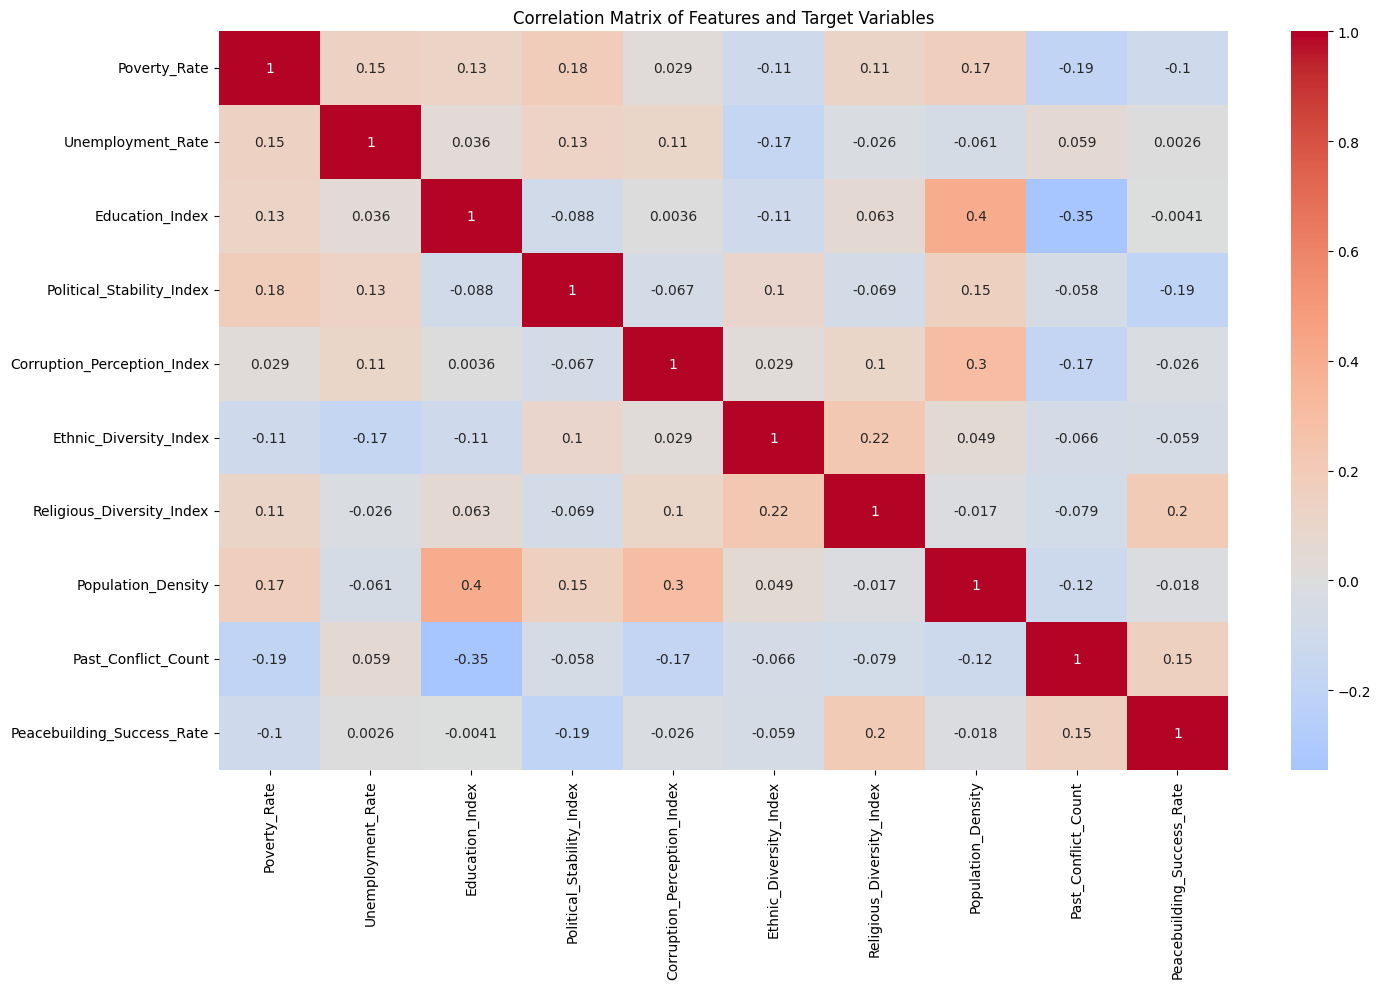

In [ ]:
# Step 3: Exploratory Data Analysis
print("\nStep 3: Exploratory Data Analysis")

# Create correlation analysis visualization
plt.figure(figsize=(15, 10))
sns.heatmap(df[feature_columns + ['Past_Conflict_Count', 'Peacebuilding_Success_Rate']].corr(),
            annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features and Target Variables')
plt.tight_layout()
plt.show()

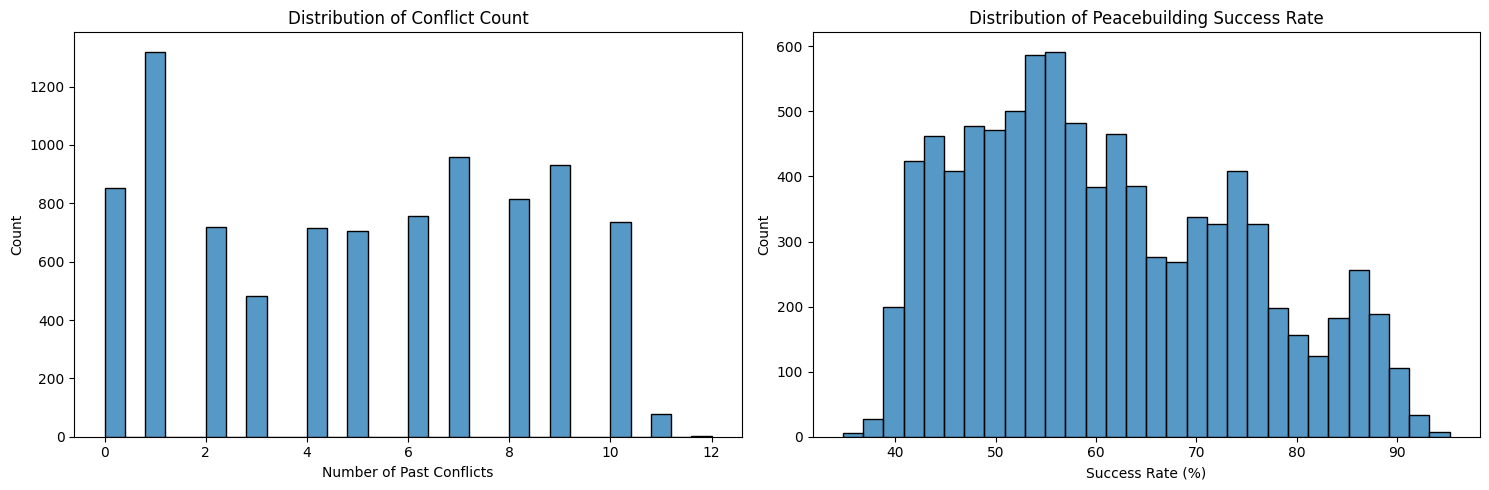

In [ ]:
# Distribution plots for target variables
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Conflict Count Distribution
sns.histplot(data=df, x='Past_Conflict_Count', bins=30, ax=ax1)
ax1.set_title('Distribution of Conflict Count')
ax1.set_xlabel('Number of Past Conflicts')

# Peacebuilding Success Rate Distribution
sns.histplot(data=df, x='Peacebuilding_Success_Rate', bins=30, ax=ax2)
ax2.set_title('Distribution of Peacebuilding Success Rate')
ax2.set_xlabel('Success Rate (%)')

plt.tight_layout()
plt.show()


# **Step 4: Model Training and Evaluation**
## In this section, I will train multiple regression models and evaluate their performance:

Models Trained:

1. **Linear Regression:** A simple regression model where we predict target variables as a weighted sum of input features.

The model predicts based on the equation:
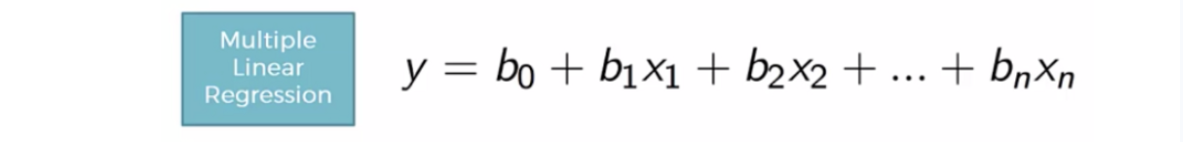

2. **Decision Tree Regressor:** A tree-based model that learns splits in the data to make predictions.

3. **Random Forest Regressor:** An ensemble of decision trees that improves accuracy by averaging predictions.

**Evaluation Metrics:**

**a. Mean Squared Error (MSE):** Measures the average squared difference between actual and predicted values.

**b. Root Mean Squared Error (RMSE):** The square root of MSE, which provides error in original units.

**R² Score:** Indicates the proportion of variance explained by the model; a higher score suggests a better fit.
Each model’s performance is printed for both targets (Conflict Risk and Peacebuilding Success).

In [ ]:
# Step 4: Model Training and Evaluation
print("\nStep 4: Model Training and Evaluation")

def train_and_evaluate_models(X_train, X_test, y_train, y_test, target_name):
    models = {
        'Linear Regression': LinearRegression(),
        'Decision Tree': DecisionTreeRegressor(random_state=42),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
    }

    results = {}

    for name, model in models.items():
        # Train model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        results[name] = {
            'model': model,
            'mse': mse,
            'rmse': rmse,
            'r2': r2,
            'predictions': y_pred
        }

        print(f"\n{name} - {target_name}")
        print(f"MSE: {mse:.4f}")
        print(f"RMSE: {rmse:.4f}")
        print(f"R2 Score: {r2:.4f}")

    return results

# Train models for both targets
conflict_results = train_and_evaluate_models(X_train_scaled, X_test_scaled,
                                           y_conflict_train, y_conflict_test,
                                           "Conflict Risk")

peace_results = train_and_evaluate_models(X_train_scaled, X_test_scaled,
                                        y_peace_train, y_peace_test,
                                        "Peacebuilding Success")



Step 4: Model Training and Evaluation

Linear Regression - Conflict Risk
MSE: 8.6746
RMSE: 2.9453
R2 Score: 0.2204

Decision Tree - Conflict Risk
MSE: 0.9587
RMSE: 0.9791
R2 Score: 0.9138

Random Forest - Conflict Risk
MSE: 0.4163
RMSE: 0.6452
R2 Score: 0.9626

Linear Regression - Peacebuilding Success
MSE: 166.7816
RMSE: 12.9144
R2 Score: 0.1068

Decision Tree - Peacebuilding Success
MSE: 11.2779
RMSE: 3.3583
R2 Score: 0.9396

Random Forest - Peacebuilding Success
MSE: 5.0698
RMSE: 2.2516
R2 Score: 0.9728


# **Step 5: Visualizing Model Performance**
For a visual assessment, **actual vs. predicted values** are plotted for each model:

1. **Scatter Plots:** Actual values on the x-axis and predicted values on the y-axis. The closer the points are to the red dashed line, the better the model’s predictions.

In [ ]:
# Step 5: Visualize Model Performance
print("\nStep 5: Visualizing Model Performance")

def plot_actual_vs_predicted(results, y_test, target_name):
    plt.figure(figsize=(15, 5))

    for i, (name, result) in enumerate(results.items(), 1):
        plt.subplot(1, 3, i)
        plt.scatter(y_test, result['predictions'], alpha=0.5)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
        plt.title(f'{name}\nR² = {result["r2"]:.3f}')
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')

    plt.suptitle(f'Actual vs Predicted - {target_name}')
    plt.tight_layout()
    plt.show()


Step 5: Visualizing Model Performance


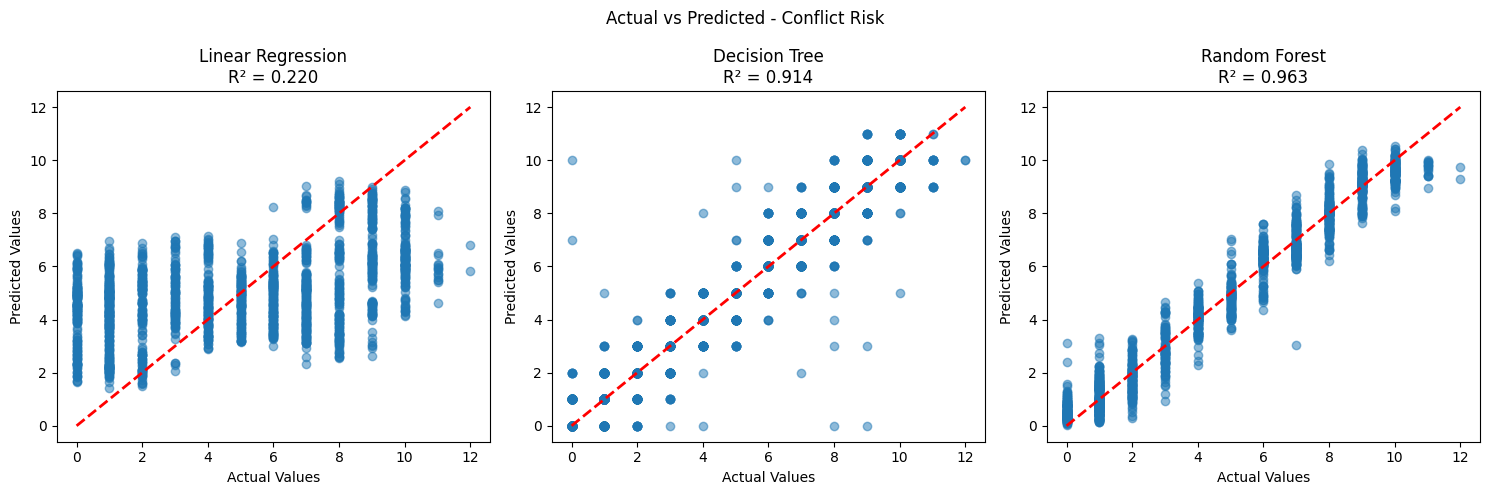

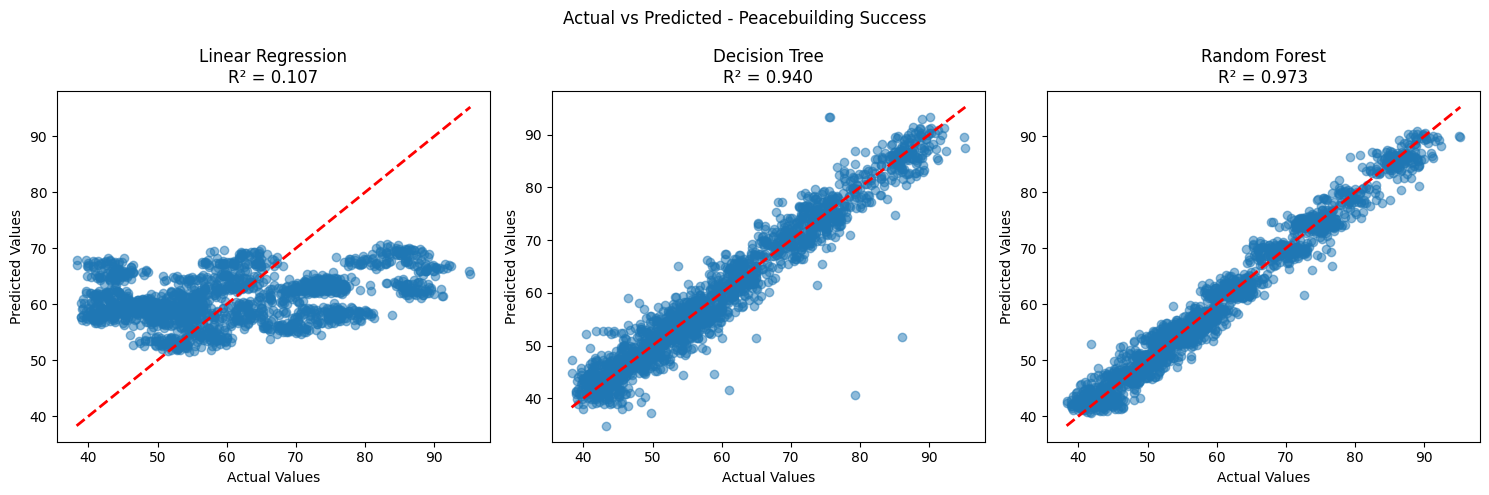

In [ ]:
# Plot results for both targets
plot_actual_vs_predicted(conflict_results, y_conflict_test, "Conflict Risk")
plot_actual_vs_predicted(peace_results, y_peace_test, "Peacebuilding Success")

# **Step 6: Feature Importance Analysis**
This analysis identifies the most impactful features in the best-performing model:

1. **Feature Importance Plot:** Displays the importance of each feature, helping interpret the model’s decisions.

In [ ]:
# Step 6: Feature Importance Analysis
print("\nStep 6: Feature Importance Analysis")

def plot_feature_importance(model, feature_names, title):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    else:
        importances = abs(model.coef_)

    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(12, 6))
    plt.title(f"Feature Importances - {title}")
    plt.bar(range(X_train.shape[1]), importances[indices])
    plt.xticks(range(X_train.shape[1]), [feature_columns[i] for i in indices], rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


Step 6: Feature Importance Analysis


In [ ]:
# Get best models based on R2 score
best_conflict_model = max(conflict_results.items(), key=lambda x: x[1]['r2'])[1]['model']
best_peace_model = max(peace_results.items(), key=lambda x: x[1]['r2'])[1]['model']

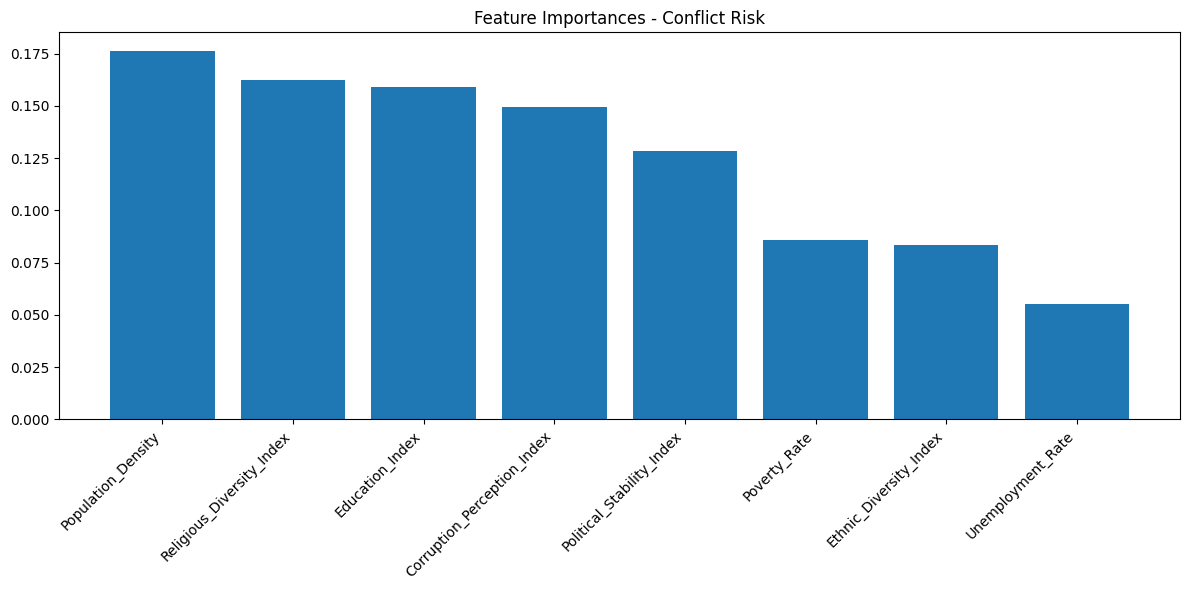

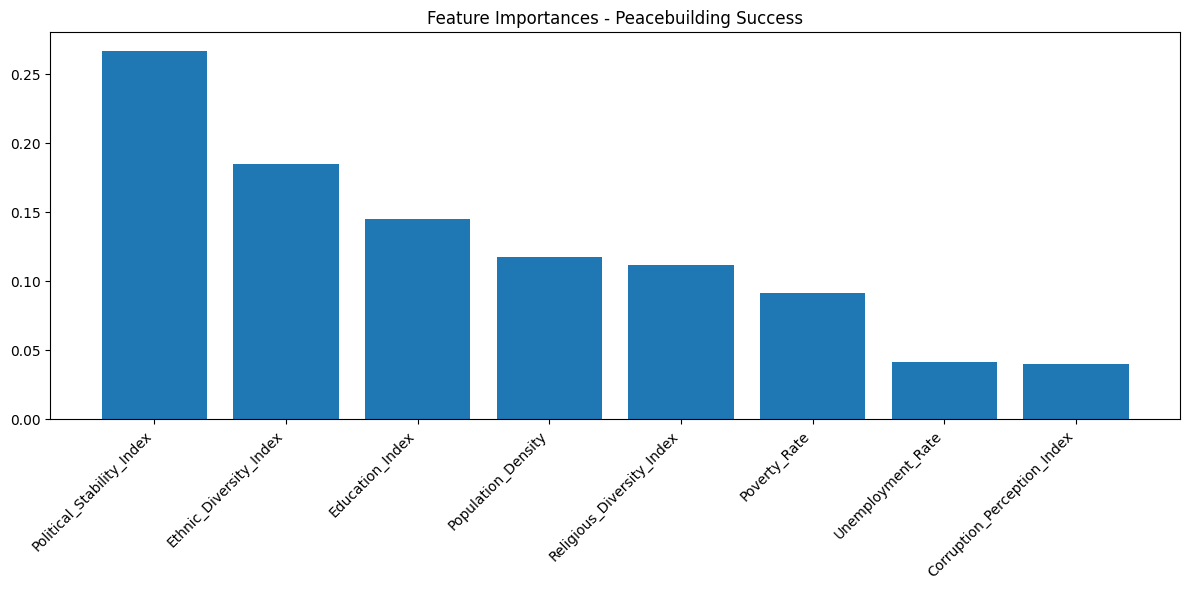

In [ ]:
# Plot feature importance
plot_feature_importance(best_conflict_model, feature_columns, "Conflict Risk")
plot_feature_importance(best_peace_model, feature_columns, "Peacebuilding Success")

# **Step 7: Saving Best Models**
Finally, we save the best-performing models along with the scaler and feature columns using joblib. This model package can be loaded later for predictions on new data.

In [ ]:
# Step 7: Save Best Models
print("\nStep 7: Saving Best Models")

# Create model package with all necessary components
model_package = {
    'conflict_model': best_conflict_model,
    'peace_model': best_peace_model,
    'scaler': scaler,
    'feature_columns': feature_columns
}



Step 7: Saving Best Models


In [ ]:
# Save the model package
joblib.dump(model_package, 'african_conflicts_peace_models.joblib')
print("Models successfully saved to 'african_conflicts_peace_models.joblib'")


Models successfully saved to 'african_conflicts_peace_models.joblib'


# **Final Model Summary**
This summary displays the best model type and R² score for each target variable, highlighting the model’s predictive quality.

In [ ]:
# Print final summary
print("\nFinal Model Summary:")
print("\nBest Model for Conflict Risk Prediction:")
print(f"Model Type: {type(best_conflict_model).__name__}")
print(f"R² Score: {max(conflict_results.items(), key=lambda x: x[1]['r2'])[1]['r2']:.4f}")

print("\nBest Model for Peacebuilding Success Prediction:")
print(f"Model Type: {type(best_peace_model).__name__}")
print(f"R² Score: {max(peace_results.items(), key=lambda x: x[1]['r2'])[1]['r2']:.4f}")


Final Model Summary:

Best Model for Conflict Risk Prediction:
Model Type: RandomForestRegressor
R² Score: 0.9626

Best Model for Peacebuilding Success Prediction:
Model Type: RandomForestRegressor
R² Score: 0.9728


## **Playgound Here for actual and predicted Results.**
### To predict from google colab and compare the actual predictions from the predicted predictions.


This goes across all the 54 countries in Africa. analysing trend from 2010 to 2022 for each country.

[Full downloaded csv file of actult predictions Vs predicted prediction for the  54 nations in Africa.](https://drive.google.com/file/d/1NJiexG2aItznQyOKA15FW17mXlYUY98B/view?usp=drive_link)

# **Case Study: Algeria**:
Here we see how the actual data collected from Algeria, from 2010 to 2022 looks like when the model is train and then the actual result compared with the predicted results.

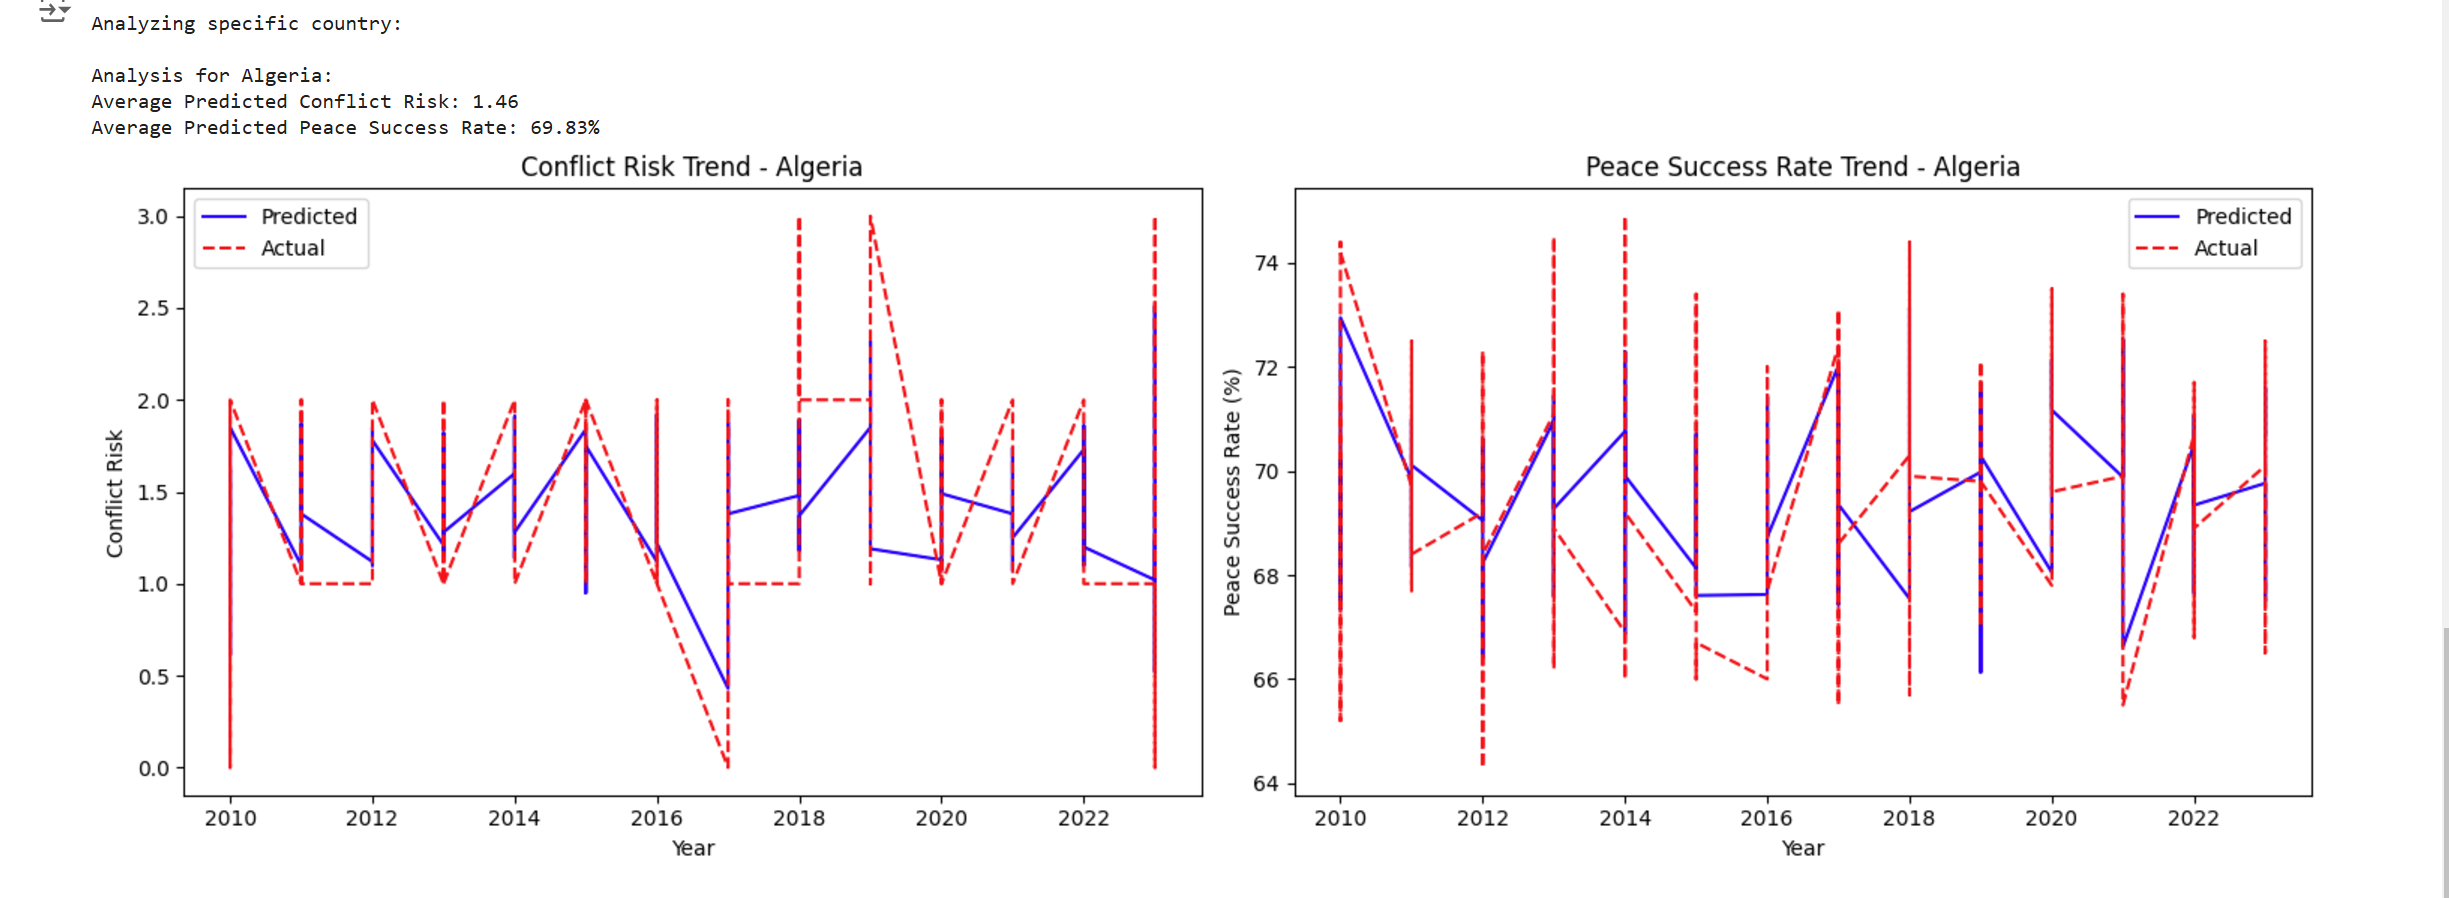

Please upload the saved model file 'african_conflicts_peace_models.joblib'


Saving african_conflicts_peace_models.joblib to african_conflicts_peace_models (1).joblib

Please upload your test CSV file 'african_countries_dataset_large.csv'


Saving african_countries_dataset_large.csv to african_countries_dataset_large (1).csv


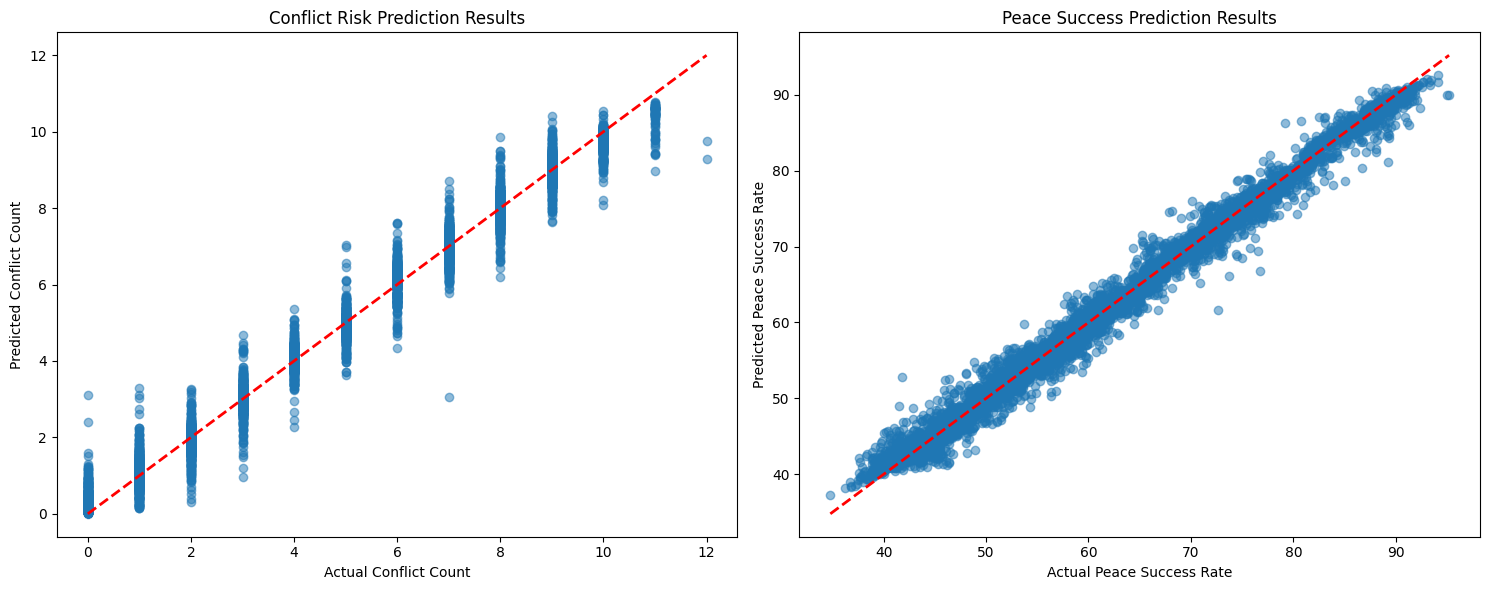


Prediction Examples:
   Country  Year  Month  Past_Conflict_Count  Predicted_Conflict_Risk  \
0  Algeria  2010      1                    2                     1.61   
1  Algeria  2010      2                    1                     1.27   
2  Algeria  2010      3                    1                     1.11   
3  Algeria  2010      4                    1                     1.39   
4  Algeria  2010      5                    1                     1.21   
5  Algeria  2010      6                    1                     1.02   
6  Algeria  2010      7                    2                     1.71   
7  Algeria  2010      8                    0                     0.61   
8  Algeria  2010      9                    1                     1.68   
9  Algeria  2010     10                    2                     1.80   

   Peacebuilding_Success_Rate  Predicted_Peace_Success  
0                        71.4                    70.28  
1                        65.9                    67.65  
2  

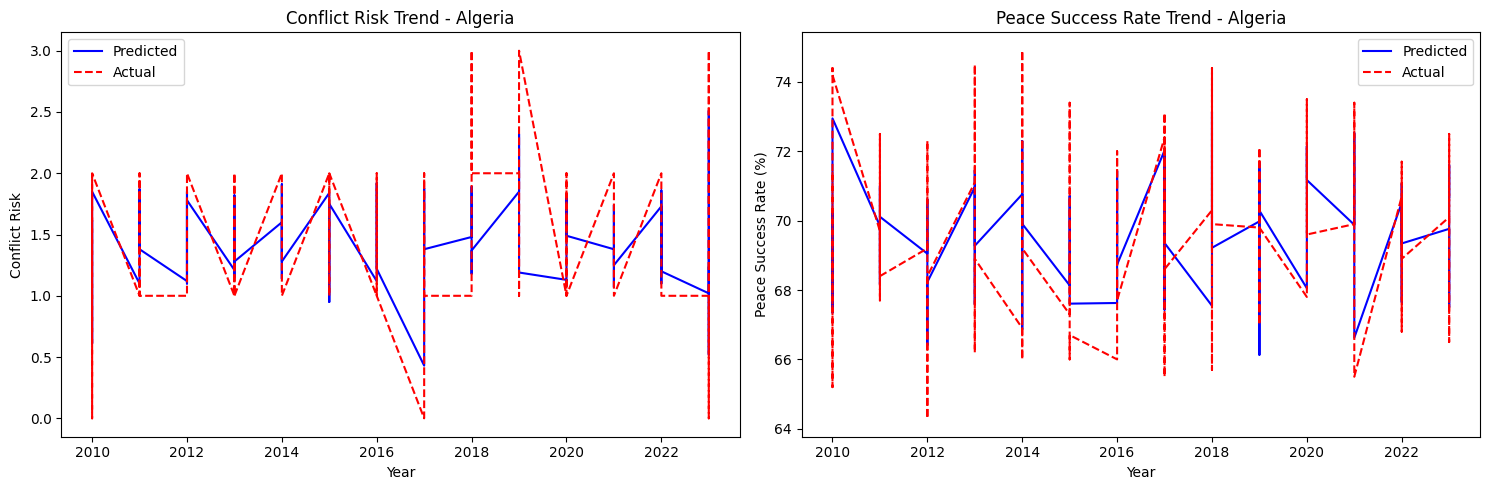


Identifying high-risk areas:

High Risk Areas Identified:
                                  Predicted_Conflict_Risk  \
Country                                                     
Equatorial Guinea                                    9.95   
Cape Verde                                           9.41   
Gambia                                               9.30   
South Sudan                                          9.15   
Mozambique                                           9.15   
Zimbabwe                                             8.21   
Rwanda                                               7.55   
Gabon                                                7.49   
Kenya                                                7.33   
Morocco                                              6.71   
Mali                                                 6.67   
Libya                                                6.55   
Angola                                               6.30   
Mauritius                 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Predictions saved to prediction_results.csv


In [ ]:
# First, let's install required packages and import libraries
!pip install joblib scikit-learn pandas numpy

import pandas as pd
import numpy as np
import joblib
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns

# Upload the saved model and test data
print("Please upload the saved model file 'african_conflicts_peace_models.joblib'")
uploaded = files.upload()

print("\nPlease upload your test CSV file 'african_countries_dataset_large.csv'")
uploaded_csv = files.upload()

# Load the model package
model_package = joblib.load('african_conflicts_peace_models.joblib')

# Extract components from the model package
conflict_model = model_package['conflict_model']
peace_model = model_package['peace_model']
scaler = model_package['scaler']
feature_columns = model_package['feature_columns']

# Load and prepare test data
test_data = pd.read_csv('african_countries_dataset_large.csv')

# Function to make predictions
def predict_conflict_and_peace(data):
    # Extract features
    X = data[feature_columns]

    # Scale features
    X_scaled = scaler.transform(X)

    # Make predictions
    conflict_predictions = conflict_model.predict(X_scaled)
    peace_predictions = peace_model.predict(X_scaled)

    return conflict_predictions, peace_predictions

# Make predictions on test data
conflict_pred, peace_pred = predict_conflict_and_peace(test_data)

# Add predictions to the test data
test_data['Predicted_Conflict_Risk'] = conflict_pred
test_data['Predicted_Peace_Success'] = peace_pred

# Calculate prediction accuracy
actual_conflict = test_data['Past_Conflict_Count']
actual_peace = test_data['Peacebuilding_Success_Rate']

# Visualization of predictions
plt.figure(figsize=(15, 6))

# Conflict Risk Predictions
plt.subplot(1, 2, 1)
plt.scatter(actual_conflict, conflict_pred, alpha=0.5)
plt.plot([actual_conflict.min(), actual_conflict.max()],
         [actual_conflict.min(), actual_conflict.max()],
         'r--', lw=2)
plt.xlabel('Actual Conflict Count')
plt.ylabel('Predicted Conflict Count')
plt.title('Conflict Risk Prediction Results')

# Peace Success Predictions
plt.subplot(1, 2, 2)
plt.scatter(actual_peace, peace_pred, alpha=0.5)
plt.plot([actual_peace.min(), actual_peace.max()],
         [actual_peace.min(), actual_peace.max()],
         'r--', lw=2)
plt.xlabel('Actual Peace Success Rate')
plt.ylabel('Predicted Peace Success Rate')
plt.title('Peace Success Prediction Results')

plt.tight_layout()
plt.show()

# Show prediction examples
print("\nPrediction Examples:")
sample_results = test_data[['Country', 'Year', 'Month',
                           'Past_Conflict_Count', 'Predicted_Conflict_Risk',
                           'Peacebuilding_Success_Rate', 'Predicted_Peace_Success']].head(10)
print(sample_results.round(2))

# Function to analyze specific country
def analyze_country(country_name):
    country_data = test_data[test_data['Country'] == country_name]

    if len(country_data) == 0:
        print(f"No data found for {country_name}")
        return

    # Calculate average predictions
    avg_conflict_risk = country_data['Predicted_Conflict_Risk'].mean()
    avg_peace_success = country_data['Predicted_Peace_Success'].mean()

    print(f"\nAnalysis for {country_name}:")
    print(f"Average Predicted Conflict Risk: {avg_conflict_risk:.2f}")
    print(f"Average Predicted Peace Success Rate: {avg_peace_success:.2f}%")

    # Plot trends over time
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.plot(country_data['Year'], country_data['Predicted_Conflict_Risk'], 'b-', label='Predicted')
    plt.plot(country_data['Year'], country_data['Past_Conflict_Count'], 'r--', label='Actual')
    plt.title(f'Conflict Risk Trend - {country_name}')
    plt.xlabel('Year')
    plt.ylabel('Conflict Risk')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(country_data['Year'], country_data['Predicted_Peace_Success'], 'b-', label='Predicted')
    plt.plot(country_data['Year'], country_data['Peacebuilding_Success_Rate'], 'r--', label='Actual')
    plt.title(f'Peace Success Rate Trend - {country_name}')
    plt.xlabel('Year')
    plt.ylabel('Peace Success Rate (%)')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage - analyze a specific country
print("\nAnalyzing specific country:")
country_name = "Algeria"  # Change this to any country in your dataset
analyze_country(country_name)

# Function to identify high-risk areas
def identify_high_risk_areas(threshold_conflict=2, threshold_peace=60):
    high_risk = test_data[
        (test_data['Predicted_Conflict_Risk'] > threshold_conflict) &
        (test_data['Predicted_Peace_Success'] < threshold_peace)
    ]

    if len(high_risk) == 0:
        print("No high-risk areas identified with current thresholds")
        return

    print("\nHigh Risk Areas Identified:")
    risk_summary = high_risk.groupby('Country').agg({
        'Predicted_Conflict_Risk': 'mean',
        'Predicted_Peace_Success': 'mean'
    }).round(2)

    print(risk_summary.sort_values('Predicted_Conflict_Risk', ascending=False))

# Identify high-risk areas
print("\nIdentifying high-risk areas:")
identify_high_risk_areas()

# Save predictions to CSV
output_filename = 'prediction_results.csv'
test_data.to_csv(output_filename, index=False)
files.download(output_filename)
print(f"\nPredictions saved to {output_filename}")